# Importing Libraries

In [106]:
import os
os.chdir("C:/Users/Abhi Matlapudi/Desktop/ML-Project Cars")

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing 
import statsmodels.formula.api as smf

# Importing Dataset

In [108]:
cars = pd.read_csv("auto-mpg.csv")

In [109]:
cars

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Engine Fuel Type
0,18.0,8,307.0,130,3504.0,12.0,70.0,1,chevrolet chevelle malibu,premium unleaded (required)
1,15.0,8,350.0,165,3693.0,11.5,70.0,1,buick skylark 320,premium unleaded (required)
2,18.0,8,318.0,150,3436.0,11.0,70.0,1,plymouth satellite,premium unleaded (required)
3,16.0,8,304.0,150,3433.0,12.0,70.0,1,amc rebel sst,premium unleaded (required)
4,17.0,8,302.0,140,3449.0,10.5,70.0,1,ford torino,premium unleaded (required)
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790.0,15.6,82.0,1,ford mustang gl,regular unleaded
394,44.0,4,97.0,52,2130.0,24.6,82.0,2,vw pickup,regular unleaded
395,32.0,4,135.0,84,2295.0,11.6,82.0,1,dodge rampage,regular unleaded
396,28.0,4,120.0,79,2625.0,18.6,82.0,1,ford ranger,regular unleaded


In [110]:
cars.describe()

,%mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2977.584184,53.035678,75.095226,2.728643
std,7.815984,1.701004,104.269838,849.402560,308.689377,8.040681,9.371522
min,9.000000,3.000000,68.000000,1613.000000,8.000000,14.300000,1.000000
25%,17.500000,4.000000,104.250000,2225.250000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3614.750000,17.300000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,3035.000000,82.000000,82.000000


In [111]:
cars.cov()

,%mpg,cylinders,displacement,weight,acceleration,model year,origin
%mpg,61.089611,-10.308911,-655.402318,-5517.440704,138.616078,12.423294,8.845526
cylinders,-10.308911,2.893415,168.623214,1300.424363,-42.617022,-1.146438,-2.085351
displacement,-655.402318,168.623214,10872.199152,82929.100139,-2346.076190,-83.280455,-125.763237
weight,-5517.440704,1300.424363,82929.100139,721484.709008,-976.815253,-967.228457,-400.266050
acceleration,138.616078,-42.617022,-2346.076190,-976.815253,95289.131469,-2169.216756,2836.772426
model year,12.423294,-1.146438,-83.280455,-967.228457,-2169.216756,64.652546,-66.225732
origin,8.845526,-2.085351,-125.763237,-400.266050,2836.772426,-66.225732,87.825424


In [112]:
cars.corr()

,%mpg,cylinders,displacement,weight,acceleration,model year,origin
%mpg,1.000000,-0.775396,-0.804203,-0.832244,0.057452,0.197679,0.120762
cylinders,-0.775396,1.000000,0.950721,0.897527,-0.081163,-0.083821,-0.130817
displacement,-0.804203,0.950721,1.000000,0.932994,-0.072889,-0.099333,-0.128702
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.057452,-0.081163,-0.072889,-0.416839,1.000000,-0.873954,0.980602
model year,0.197679,-0.083821,-0.099333,-0.309120,-0.873954,1.000000,-0.878868
origin,0.120762,-0.130817,-0.128702,-0.585005,0.980602,-0.878868,1.000000


In [113]:
cars.head()

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Engine Fuel Type
0,18.0,8,307.0,130,3504.0,12.0,70.0,1,chevrolet chevelle malibu,premium unleaded (required)
1,15.0,8,350.0,165,3693.0,11.5,70.0,1,buick skylark 320,premium unleaded (required)
2,18.0,8,318.0,150,3436.0,11.0,70.0,1,plymouth satellite,premium unleaded (required)
3,16.0,8,304.0,150,3433.0,12.0,70.0,1,amc rebel sst,premium unleaded (required)
4,17.0,8,302.0,140,3449.0,10.5,70.0,1,ford torino,premium unleaded (required)


In [114]:
cars.tail()

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Engine Fuel Type
393,27.0,4,140.0,86,2790.0,15.6,82.0,1,ford mustang gl,regular unleaded
394,44.0,4,97.0,52,2130.0,24.6,82.0,2,vw pickup,regular unleaded
395,32.0,4,135.0,84,2295.0,11.6,82.0,1,dodge rampage,regular unleaded
396,28.0,4,120.0,79,2625.0,18.6,82.0,1,ford ranger,regular unleaded
397,31.0,4,119.0,82,2720.0,19.4,82.0,1,chevy s-10,regular unleaded


In [115]:
cars.columns

Index(['%mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'Engine Fuel Type'],
      dtype='object')

In [116]:
cars.dtypes

%mpg                float64
cylinders             int64
displacement        float64
horsepower           object
weight              float64
acceleration        float64
model year          float64
origin                int64
car name             object
Engine Fuel Type     object
dtype: object

In [117]:
cars.shape

(398, 10)

# Missing values treatment

In [118]:
cars.isnull().any()

%mpg                False
cylinders           False
displacement        False
horsepower          False
weight               True
acceleration        False
model year          False
origin              False
car name            False
Engine Fuel Type    False
dtype: bool

In [119]:
cars['horsepower']=cars['horsepower'].replace('?',np.nan)


In [120]:
cars['horsepower'].isnull().sum()

6

In [121]:
cars['horsepower']=cars['horsepower'].astype('float64')

In [122]:
mean_hp=cars['horsepower'].mean()

In [123]:
cars['horsepower'].fillna(mean_hp,inplace=True)

In [124]:
mean_weight = cars['weight'].mean()

In [125]:
mean_weight

2977.5841836734694

In [126]:
cars['weight'].fillna(mean_weight,inplace=True)

In [127]:
cars.isnull().sum()

%mpg                0
cylinders           0
displacement        0
horsepower          0
weight              0
acceleration        0
model year          0
origin              0
car name            0
Engine Fuel Type    0
dtype: int64

In [128]:
cars

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Engine Fuel Type
0,18.0,8,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu,premium unleaded (required)
1,15.0,8,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320,premium unleaded (required)
2,18.0,8,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite,premium unleaded (required)
3,16.0,8,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst,premium unleaded (required)
4,17.0,8,302.0,140.0,3449.0,10.5,70.0,1,ford torino,premium unleaded (required)
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82.0,1,ford mustang gl,regular unleaded
394,44.0,4,97.0,52.0,2130.0,24.6,82.0,2,vw pickup,regular unleaded
395,32.0,4,135.0,84.0,2295.0,11.6,82.0,1,dodge rampage,regular unleaded
396,28.0,4,120.0,79.0,2625.0,18.6,82.0,1,ford ranger,regular unleaded


# Data Visualization

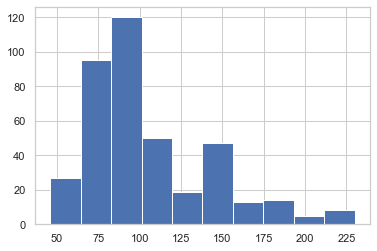

In [129]:
cars['horsepower'].hist(bins=10)

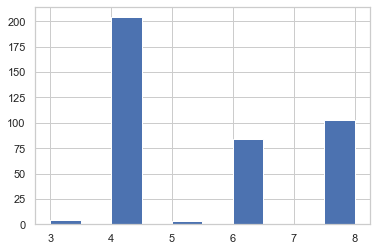

In [130]:
cars['cylinders'].hist(bins=10)

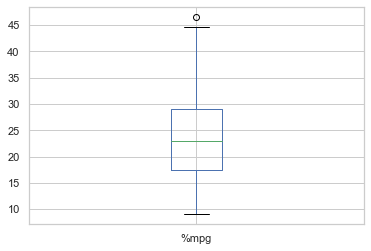

In [131]:
cars.boxplot(column='%mpg')

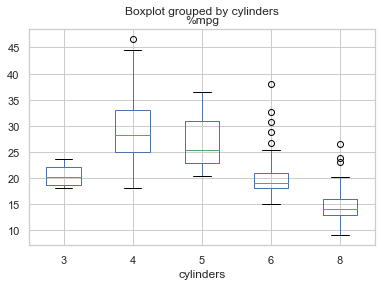

In [132]:
cars.boxplot(column='%mpg',by='cylinders')

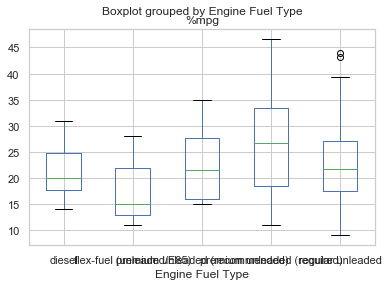

In [133]:
cars.boxplot(column='%mpg',by='Engine Fuel Type')

In [134]:
cars=cars.drop('car name',axis=1)

In [135]:
cars

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Engine Fuel Type
0,18.0,8,307.0,130.0,3504.0,12.0,70.0,1,premium unleaded (required)
1,15.0,8,350.0,165.0,3693.0,11.5,70.0,1,premium unleaded (required)
2,18.0,8,318.0,150.0,3436.0,11.0,70.0,1,premium unleaded (required)
3,16.0,8,304.0,150.0,3433.0,12.0,70.0,1,premium unleaded (required)
4,17.0,8,302.0,140.0,3449.0,10.5,70.0,1,premium unleaded (required)
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82.0,1,regular unleaded
394,44.0,4,97.0,52.0,2130.0,24.6,82.0,2,regular unleaded
395,32.0,4,135.0,84.0,2295.0,11.6,82.0,1,regular unleaded
396,28.0,4,120.0,79.0,2625.0,18.6,82.0,1,regular unleaded


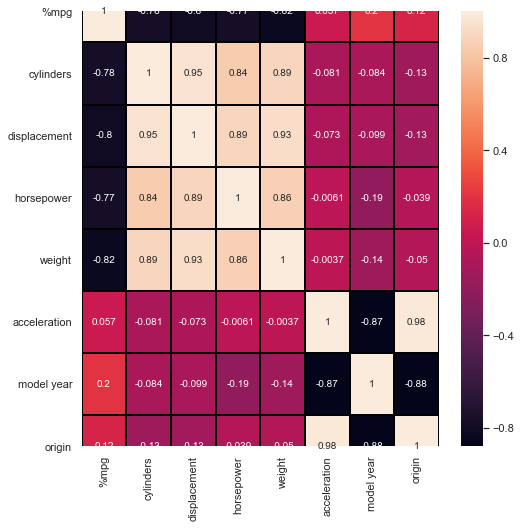

In [136]:
import seaborn as sns
sns.heatmap(cars.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

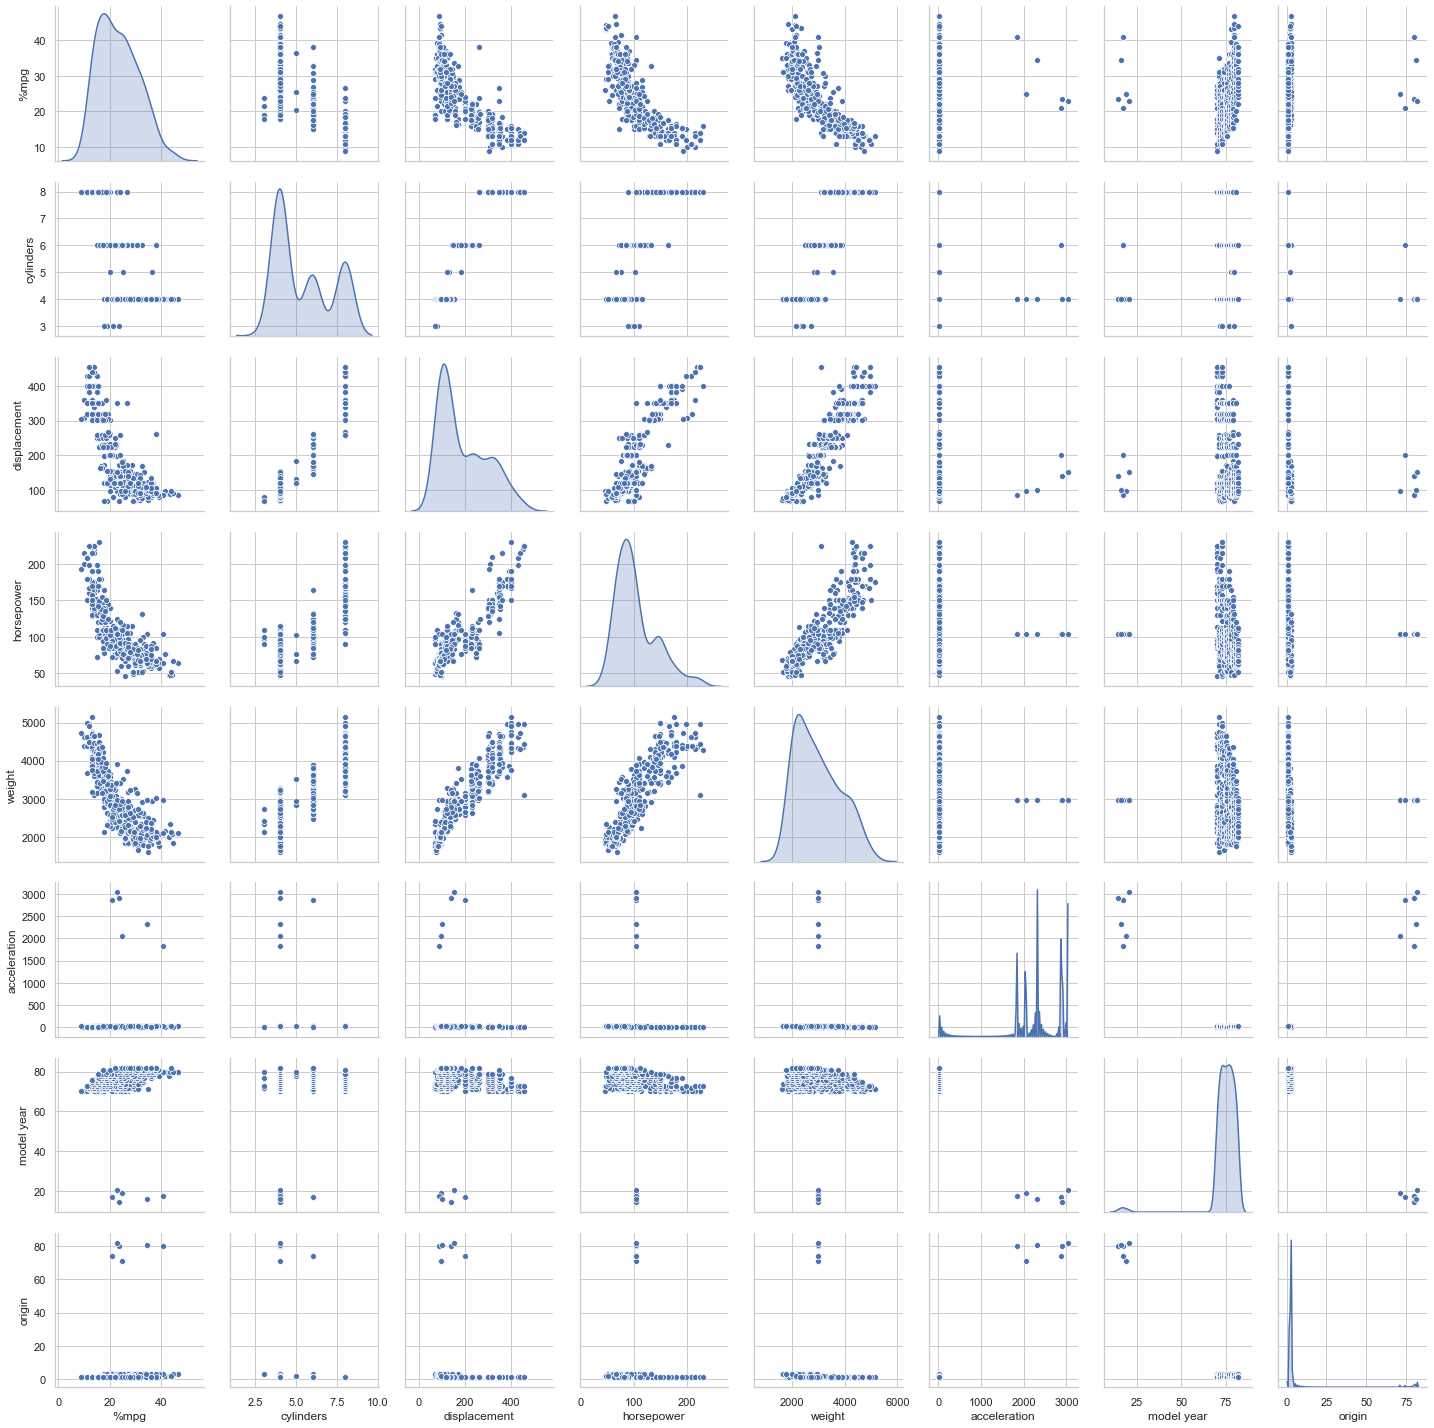

In [137]:
sns.pairplot(cars,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

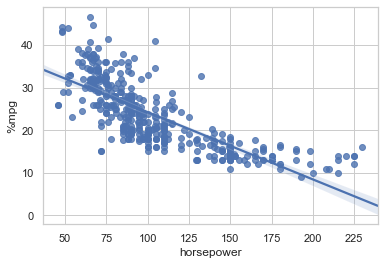

In [138]:
sns.regplot(x="horsepower", y="%mpg", data=cars)

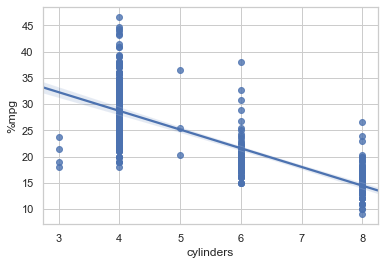

In [139]:
sns.regplot(x="cylinders", y="%mpg", data=cars)

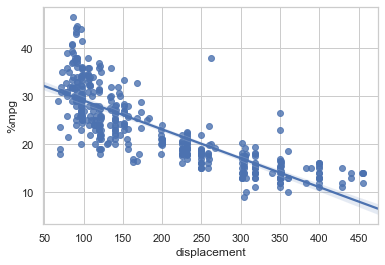

In [140]:
sns.regplot(x="displacement", y="%mpg", data=cars)

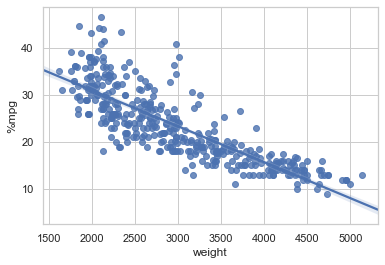

In [141]:
sns.regplot(x="weight", y="%mpg", data=cars)

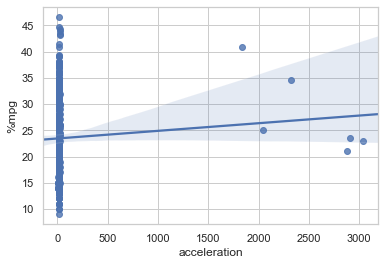

In [142]:
sns.regplot(x="acceleration", y="%mpg", data=cars)

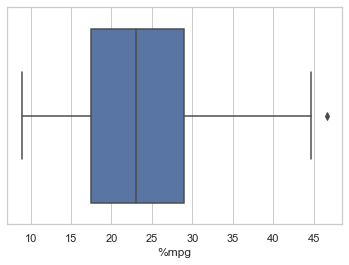

In [143]:
sns.set(style="whitegrid")
sns.boxplot(x=cars["%mpg"])

# Label Encoding

In [144]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
cars['Engine Fuel Type']=labelencoder_y.fit_transform(cars['Engine Fuel Type'])

In [145]:
cars

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Engine Fuel Type
0,18.0,8,307.0,130.0,3504.0,12.0,70.0,1,3
1,15.0,8,350.0,165.0,3693.0,11.5,70.0,1,3
2,18.0,8,318.0,150.0,3436.0,11.0,70.0,1,3
3,16.0,8,304.0,150.0,3433.0,12.0,70.0,1,3
4,17.0,8,302.0,140.0,3449.0,10.5,70.0,1,3
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82.0,1,4
394,44.0,4,97.0,52.0,2130.0,24.6,82.0,2,4
395,32.0,4,135.0,84.0,2295.0,11.6,82.0,1,4
396,28.0,4,120.0,79.0,2625.0,18.6,82.0,1,4


# One Hot Encoding

In [146]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(categorical_features=[1])
x=oh.fit_transform(x).toarray()  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [147]:
x

array([[ 0.,  0.,  0., ..., 70.,  1.,  3.],
       [ 0.,  0.,  0., ..., 70.,  1.,  3.],
       [ 0.,  0.,  0., ..., 70.,  1.,  3.],
       ...,
       [ 0.,  0.,  0., ..., 82.,  1.,  4.],
       [ 0.,  0.,  0., ..., 82.,  1.,  4.],
       [ 0.,  0.,  0., ..., 82.,  1.,  4.]])

In [148]:
x=x[:,8:]

In [149]:
x

array([[ 0.,  0.,  0., ..., 70.,  1.,  3.],
       [ 0.,  0.,  0., ..., 70.,  1.,  3.],
       [ 0.,  0.,  0., ..., 70.,  1.,  3.],
       ...,
       [ 0.,  0.,  0., ..., 82.,  1.,  4.],
       [ 0.,  0.,  0., ..., 82.,  1.,  4.],
       [ 0.,  0.,  0., ..., 82.,  1.,  4.]])

# Outlier 

In [150]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(cars))
print(z)

[[0.7064387  1.49819126 1.0906037  ... 0.63447853 0.18468921 0.23688156]
 [1.09075062 1.49819126 1.5035143  ... 0.63447853 0.18468921 0.23688156]
 [0.7064387  1.49819126 1.19623199 ... 0.63447853 0.18468921 0.23688156]
 ...
 [1.08701694 0.85632057 0.56103873 ... 0.85981086 0.18468921 0.68742099]
 [0.57460104 0.85632057 0.70507731 ... 0.85981086 0.18468921 0.68742099]
 [0.95891297 0.85632057 0.71467988 ... 0.85981086 0.18468921 0.68742099]]


In [151]:
threshold = 3
print(np.where(z > 3))

(array([  6,   8,  13,  32,  32,  32,  95, 116, 126, 126, 126, 135, 140,
       142, 144, 146, 153, 159, 161, 164, 174, 175, 182, 187, 190, 256,
       257, 258, 259, 330, 330, 330, 336, 336, 336, 354, 354, 354, 374,
       374, 374], dtype=int64), array([3, 3, 3, 5, 6, 7, 3, 3, 5, 6, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7],
      dtype=int64))


In [152]:
print(z[6][3])

3.0282326205181938


In [153]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

%mpg                  11.500
cylinders              4.000
displacement         157.750
horsepower            49.000
weight              1379.500
acceleration           3.475
model year             6.000
origin                 1.000
Engine Fuel Type       1.000
dtype: float64


In [154]:
print(cars < (Q1 - 1.5 * IQR)) |(cars > (Q3 + 1.5 * IQR))

      %mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    False      False         False       False   False         False   
1    False      False         False       False   False         False   
2    False      False         False       False   False         False   
3    False      False         False       False   False         False   
4    False      False         False       False   False         False   
..     ...        ...           ...         ...     ...           ...   
393  False      False         False       False   False         False   
394  False      False         False       False   False         False   
395  False      False         False       False   False         False   
396  False      False         False       False   False         False   
397  False      False         False       False   False         False   

     model year  origin  Engine Fuel Type  
0         False   False             False  
1         False   False            

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [164]:
cars_o = cars[(z < 3).all(axis=1)]

In [165]:
cars_o

,%mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Engine Fuel Type
0,18.0,8,307.0,130.0,3504.0,12.0,70.0,1,3
1,15.0,8,350.0,165.0,3693.0,11.5,70.0,1,3
2,18.0,8,318.0,150.0,3436.0,11.0,70.0,1,3
3,16.0,8,304.0,150.0,3433.0,12.0,70.0,1,3
4,17.0,8,302.0,140.0,3449.0,10.5,70.0,1,3
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82.0,1,4
394,44.0,4,97.0,52.0,2130.0,24.6,82.0,2,4
395,32.0,4,135.0,84.0,2295.0,11.6,82.0,1,4
396,28.0,4,120.0,79.0,2625.0,18.6,82.0,1,4


In [166]:
cars.shape

(398, 9)

In [167]:
cars_o.shape

(369, 9)

In [168]:
cars_out = cars[~((cars < (Q1 - 1.5 * IQR)) |(cars > (Q3 + 1.5 * IQR))).any(axis=1)]
cars_out.shape

(334, 9)

# Feature Scaling

In [169]:
x=cars.iloc[:,1:9].values
x

array([[  8., 307., 130., ...,  70.,   1.,   3.],
       [  8., 350., 165., ...,  70.,   1.,   3.],
       [  8., 318., 150., ...,  70.,   1.,   3.],
       ...,
       [  4., 135.,  84., ...,  82.,   1.,   4.],
       [  4., 120.,  79., ...,  82.,   1.,   4.],
       [  4., 119.,  82., ...,  82.,   1.,   4.]])

In [170]:
y=cars.iloc[:,0].values
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

# Splitting into Train  set and Test set

In [171]:
from sklearn.model_selection import train_test_split  #train_test_split splits arrays or matrices into random train and test subsets. 
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state =1) 

In [172]:
X_train

array([[  8., 305., 130., ...,  79.,   1.,   4.],
       [  4.,  91.,  68., ...,  82.,   3.,   4.],
       [  4.,  83.,  61., ...,  74.,   3.,   3.],
       ...,
       [  8., 304., 150., ...,  72.,   1.,   1.],
       [  4.,  97.,  75., ...,  77.,   3.,   3.],
       [  6., 232., 100., ...,  71.,   1.,   4.]])

In [173]:
y_train

array([17. , 31. , 32. , 27. , 12. , 17. , 16. , 29.8, 36. , 17.5, 36. ,
       44.6, 20.6, 22. , 24. , 36.1, 18. , 16. , 22. , 29. , 43.1, 18. ,
       24. , 15. , 26. , 26. , 16. , 23.8, 13. , 21.1, 28. , 36.1, 20. ,
       39. , 20. , 26. , 38. , 27. , 14. , 13. , 18. , 37. , 30. , 31. ,
        9. , 25. , 27. , 19. , 25. , 23.9, 18. , 40.9, 20.5, 32.2, 19. ,
       31.5, 17. , 34. , 14. , 15. , 15. , 22. , 18.6, 17. , 44. , 32. ,
       15.5, 36. , 22. , 46.6, 18. , 26.5, 23. , 36. , 19. , 21. , 23. ,
       25.5, 37.3, 14. , 24. , 23. , 21. , 12. , 31. , 20. , 17. , 13. ,
       21. , 40.8, 17.5, 25. , 28. , 16. , 34.2, 16. , 16.5, 25.4, 30. ,
       22.4, 15.5, 30. , 26. , 26.4, 31.9, 19.2, 33. , 18. , 26. , 24. ,
       23.9, 23. , 35.1, 35. , 19. , 22.5, 33. , 28. , 43.4, 11. , 33.5,
       26. , 16.9, 20. , 13. , 24. , 14. , 26. , 17.5, 19. , 44.3, 15. ,
       30.9, 13. , 19. , 30.5, 24. , 28.4, 19. , 31.6, 25. , 23. , 14. ,
       18. , 22. , 17.7, 27. , 24. , 34.4, 18. , 30

# Linear Regression 

In [174]:
X = cars['weight']
Y = cars['%mpg']

In [175]:
X

0      3504.0
1      3693.0
2      3436.0
3      3433.0
4      3449.0
        ...  
393    2790.0
394    2130.0
395    2295.0
396    2625.0
397    2720.0
Name: weight, Length: 398, dtype: float64

In [176]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: %mpg, Length: 398, dtype: float64

In [177]:
from sklearn.model_selection import train_test_split  #train_test_split splits arrays or matrices into random train and test subsets. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state =1)

In [178]:
X_train

58     2126.0
236    2755.0
286    3725.0
353    2190.0
307    2700.0
        ...  
393    2790.0
255    2720.0
72     3892.0
235    2265.0
37     3288.0
Name: weight, Length: 358, dtype: float64

In [179]:
X_train = X_train.values.reshape((-1,1))

In [180]:
X_train

array([[2126.        ],
       [2755.        ],
       [3725.        ],
       [2190.        ],
       [2700.        ],
       [3380.        ],
       [3525.        ],
       [4274.        ],
       [2171.        ],
       [3645.        ],
       [2130.        ],
       [2800.        ],
       [4055.        ],
       [4363.        ],
       [2075.        ],
       [2288.        ],
       [4633.        ],
       [4129.        ],
       [1990.        ],
       [1965.        ],
       [1980.        ],
       [1965.        ],
       [3880.        ],
       [2725.        ],
       [3940.        ],
       [2144.        ],
       [2595.        ],
       [3060.        ],
       [2490.        ],
       [4237.        ],
       [3955.        ],
       [2395.        ],
       [3609.        ],
       [2670.        ],
       [4096.        ],
       [2125.        ],
       [2950.        ],
       [4140.        ],
       [4657.        ],
       [2234.        ],
       [3900.        ],
       [3086.   

In [181]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train) 

In [182]:
accuracy = model.score(X_train,y_train)
print("Accuracy of the model: ",accuracy)

Accuracy of the model:  0.671906368314504


In [183]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 46.563268544075186
slope: [-0.00773423]


In [184]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
X_test

174    2984.0
359    3230.0
250    3735.0
274    2830.0
283    3265.0
232    4335.0
117    1867.0
348    2050.0
189    3962.0
106    4499.0
371    2525.0
222    4060.0
261    3410.0
242    2600.0
343    1755.0
179    2945.0
5      4341.0
125    3102.0
90     4952.0
303    2020.0
173    2545.0
233    1940.0
17     2587.0
29     2130.0
315    3003.0
102    1950.0
356    2350.0
246    1985.0
4      3449.0
388    2585.0
386    2945.0
6      4354.0
78     2979.0
267    2560.0
234    2740.0
85     4100.0
185    2255.0
95     4951.0
395    2295.0
132    2542.0
Name: weight, dtype: float64

In [186]:
y_test

array([18. , 28.1, 19.4, 20.3, 20.2, 16. , 29. , 37.7, 15.5, 12. , 29. ,
       17. , 18.1, 21.5, 39.1, 22. , 15. , 20. , 12. , 31.8, 24. , 29. ,
       21. , 27. , 24.3, 26. , 32.4, 32.8, 17. , 26. , 25. , 14. , 21. ,
       27.5, 24.5, 13. , 26. , 12. , 32. , 25. ])

# Multiple Linear Regression

In [187]:
X = cars[['displacement','weight']]
Y = cars['%mpg']

In [188]:
X

,displacement,weight
0,307.0,3504.0
1,350.0,3693.0
2,318.0,3436.0
3,304.0,3433.0
4,302.0,3449.0
...,...,...
393,140.0,2790.0
394,97.0,2130.0
395,135.0,2295.0
396,120.0,2625.0


In [189]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: %mpg, Length: 398, dtype: float64

In [190]:
x=cars.iloc[:,1:9].values
x

array([[  8., 307., 130., ...,  70.,   1.,   3.],
       [  8., 350., 165., ...,  70.,   1.,   3.],
       [  8., 318., 150., ...,  70.,   1.,   3.],
       ...,
       [  4., 135.,  84., ...,  82.,   1.,   4.],
       [  4., 120.,  79., ...,  82.,   1.,   4.],
       [  4., 119.,  82., ...,  82.,   1.,   4.]])

In [191]:
y=cars.iloc[:,0].values
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

In [207]:
from sklearn.model_selection import train_test_split  #train_test_split splits arrays or matrices into random train and test subsets. 
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state =1) 

In [208]:
X_train

array([[  8., 305., 130., ...,  79.,   1.,   4.],
       [  4.,  91.,  68., ...,  82.,   3.,   4.],
       [  4.,  83.,  61., ...,  74.,   3.,   3.],
       ...,
       [  8., 304., 150., ...,  72.,   1.,   1.],
       [  4.,  97.,  75., ...,  77.,   3.,   3.],
       [  6., 232., 100., ...,  71.,   1.,   4.]])

In [209]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train) 

In [210]:
predictions = model.predict(x)

In [211]:
accuracy=model.score(x,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.822904450117267


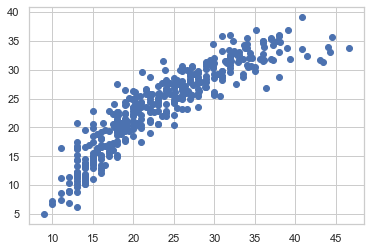

In [212]:
plt.scatter(y, predictions)

# Decision Tree Regressor

In [213]:
from sklearn.tree import DecisionTreeRegressor 
#Create the Decision Tree regressor object 
regressor = DecisionTreeRegressor(random_state=0)

In [214]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [215]:
y_pred = regressor.predict([[4,120,98,2380,20,70,3,3]])

In [216]:
y_pred

array([25.])

In [217]:
accuracy = regressor.score(X_train,y_train)
print("Accuracy of the model : ", accuracy)

Accuracy of the model :  1.0


# Random Forest Regressor

In [218]:
from sklearn.ensemble import RandomForestRegressor 

In [219]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [220]:
regressor.fit(X_train, y_train)   

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [221]:
y_pred = regressor.predict([[4,120,98,2380,20,70,3,3]])

In [222]:
y_pred

array([22.269])

In [223]:
accuracy = regressor.score(X_train,y_train)
print("Accuracy of the model : ", accuracy)

Accuracy of the model :  0.9753418976424413
